2020s
==

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import h5netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [77]:
file_path_landfrac = r'C:\Users\jaybr\OneDrive\Desktop\UROP\sftlf_fx_CESM2-WACCM_G6sulfur_r1i1p1f2_gn.nc'
landfrac_dataset = xr.open_dataset(file_path_landfrac)
file_path_temp = r'C:\Users\jaybr\OneDrive\Desktop\UROP\tas_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc'
temperature_dataset = xr.open_dataset(file_path_temp)
file_path_pr = r'C:\Users\jaybr\OneDrive\Desktop\UROP\pr_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc'
pr_dataset = xr.open_dataset(file_path_pr)
file_path_area = r'C:\Users\jaybr\OneDrive\Desktop\UROP\areacella_fx_CESM2-WACCM_G6sulfur_r1i1p1f2_gn.nc'
area_dataset = xr.open_dataset(file_path_area)

C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [78]:
temperature_dataset_masked = temperature_dataset.where(landfrac_dataset['sftlf'] > 50)

In [130]:
start = '2020-01-01'
end = '2029-12-31'

tas = temperature_dataset_masked['tas'].sel(time=slice(start, end))

In [131]:
area_masked = area_dataset.where(landfrac_dataset['sftlf'] > 50)

In [132]:
MAT = tas.mean(dim='time')

In [133]:
pr_dataset_masked = pr_dataset.where(landfrac_dataset['sftlf'] > 50) 

In [134]:
pr = pr_dataset_masked['pr'].sel(time=slice(start, end))

In [135]:
MAP = (pr*60*60*24*365.25).mean(dim='time')

In [136]:
pr_converted = (pr*60*60*24*365.25)

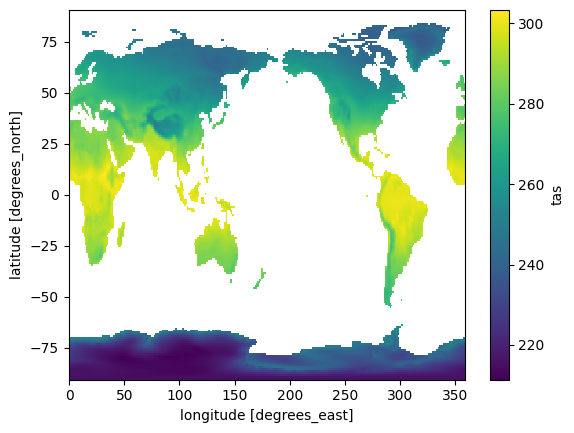

In [137]:
Tcold = temperature_dataset_masked['tas'].sel(time=slice(start, end)).groupby("time.month").mean().min(dim='month')
Tcold.plot()

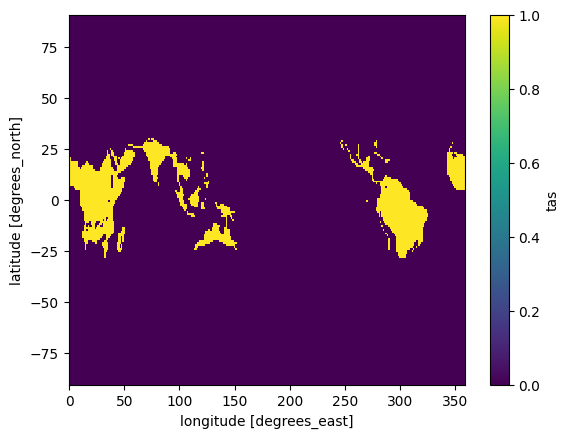

In [138]:
A = xr.where((Tcold>=(273.15+18)), True, False)
A.plot()

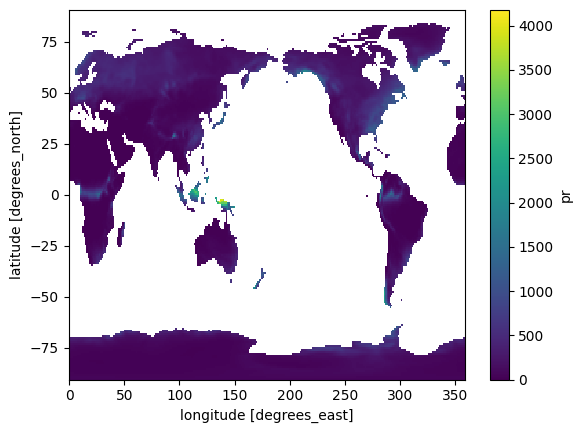

In [139]:
Pdry =  pr_converted.sel(time=slice(start, end)).groupby("time.month").mean().min(dim='month')
Pdry.plot()

In [140]:
Pdry

<xarray.DataArray 'pr' (lat: 192, lon: 288)>
array([[56.11142 , 56.111427, 56.111347, ..., 56.11143 , 56.111427,
        56.11144 ],
       [51.535973, 51.66088 , 51.954723, ..., 51.440266, 51.492126,
        51.51084 ],
       [39.61932 , 39.506714, 39.388527, ..., 40.652912, 40.339405,
        39.949795],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

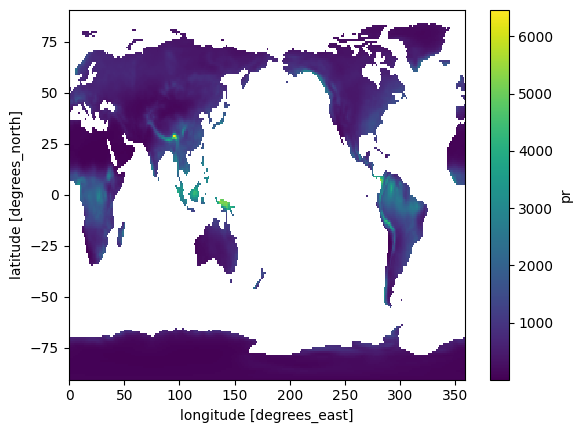

In [141]:
MAP.plot()

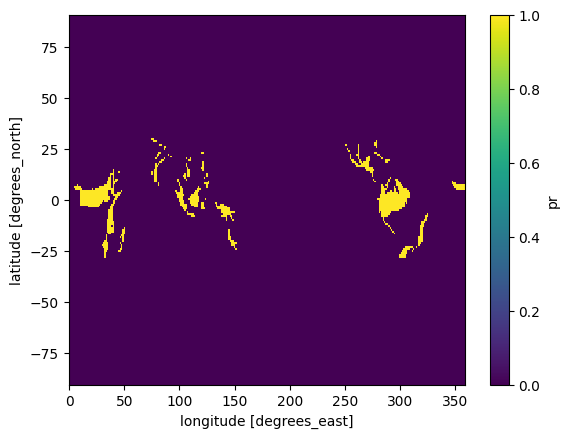

In [142]:
Af = xr.where(np.logical_and((Pdry>=60), A), True, False)
Af.plot()

monsoon (Am) = not Af, Pdry >= 100-MAP/25

savannah (Aw) = not Af, Pdry < 100-MAP/25

In [143]:
Am_criteria = xr.where(np.logical_and(Pdry<60, (Pdry>=(100-(MAP/25)))), True, False)

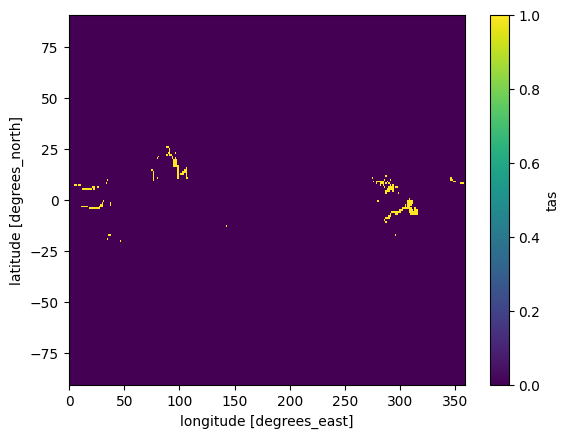

In [144]:
Am = xr.where(np.logical_and(A, Am_criteria), True, False)
Am.plot()

In [145]:
Aw_criteria = xr.where(np.logical_and(Pdry<60, (Pdry<(100-MAP/25))), True, False)

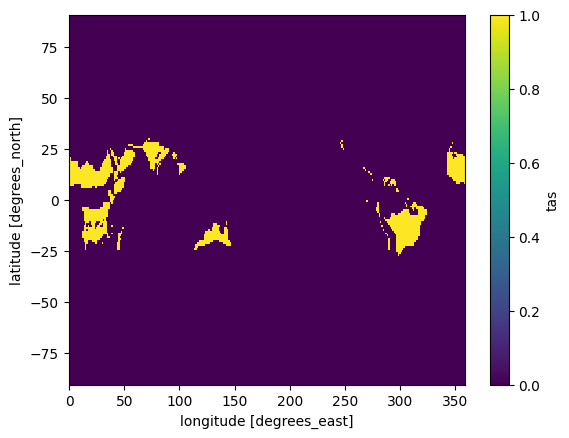

In [146]:
Aw = xr.where(np.logical_and(A, Aw_criteria), True, False)
Aw.plot() 

In [147]:
A_set = xr.Dataset()

In [148]:
A_set['lat'] = A.lat
A_set['lon'] = A.lon

In [149]:
A_set['A'] = A
A_set['A'].attrs= {'long_name' : 'tropical'}

In [150]:
A_set['Af'] = Af
A_set['Af'].attrs= {'long_name' : 'tropical rainforest'}

In [151]:
A_set['Am'] = Am
A_set['Am'].attrs= {'long_name' : 'tropical monsoon'}

In [152]:
A_set['Aw'] = Aw
A_set['Aw'].attrs= {'long_name' : 'tropical savannah'}

In [153]:
A_set

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    A        (lat, lon) bool False False False False ... False False False False
    Af       (lat, lon) bool False False False False ... False False False False
    Am       (lat, lon) bool False False False False ... False False False False
    Aw       (lat, lon) bool False False False False ... False False False False

In [154]:
A_set.to_netcdf(path='/Users/jaybr/OneDrive/Desktop/UROP/TROPICAL_dataset_2020s_SSP5_8.5.nc', mode='w')

In [155]:
file_path = r'C:\Users\jaybr\OneDrive\Desktop\UROP\TROPICAL_dataset_2020s_SSP5_8.5.nc'
dataset = xr.open_dataset(file_path)
file_path_2 = r'C:\Users\jaybr\OneDrive\Desktop\UROP\TROPICAL_dataset_2090s_SSP5_8.5.nc'
dataset_2 = xr.open_dataset(file_path_2)

In [163]:
percent_20 = (area_masked["areacella"]*dataset["Am"]).sum()/area_masked["areacella"].sum()*100
percent_90 = (area_masked["areacella"]*dataset_2["Am"]).sum()/area_masked["areacella"].sum()*100

In [164]:
percent_90 - percent_20

<xarray.DataArray ()>
array(-0.45466144)

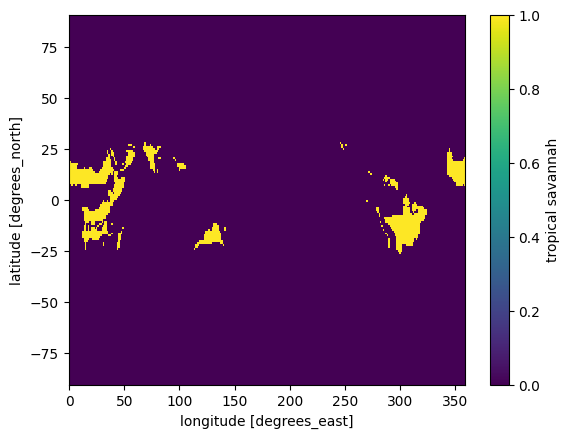

In [45]:
dataset['Aw'].plot()

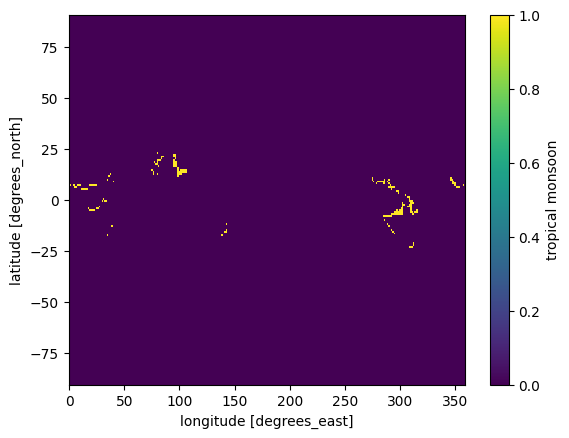

In [46]:
dataset['Am'].plot()

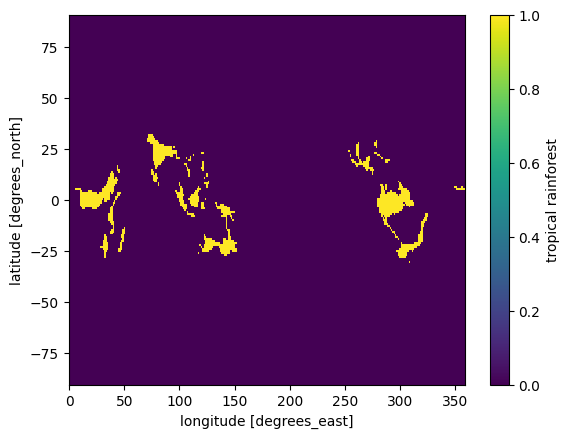

In [40]:
A_set['Af'].plot()